In [357]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [358]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

In [359]:
X_cancer.shape, y_cancer.shape

((569, 30), (569,))

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer)
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)


In [361]:
model = Sequential(
    [
        Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(30, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)
model.summary()

d:\hello_python\test_one\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,891 (7.39 KB)

 Trainable params: 1,891 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

In [362]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

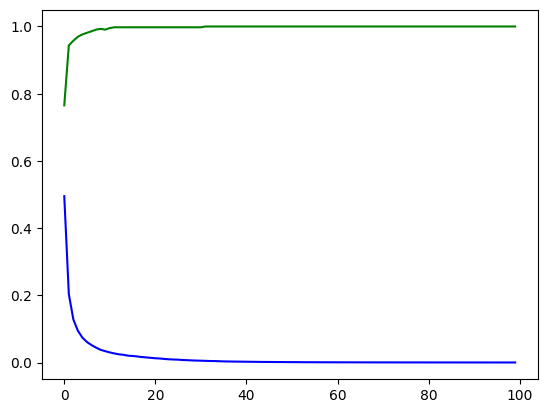

In [363]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['accuracy'], color='green')
plt.show()



In [364]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9584 - loss: 0.4495 
Loss: 0.3362864553928375, Accuracy: 0.9650349617004395
